In [24]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math


In [25]:
def gaussian_kernel(kernel_size, sigma = None):
    if not sigma:
        sigma = np.sqrt(kernel_size)
    print("Sigma = {}".format(sigma))
    mu = np.floor(kernel_size / 2)
    kernel = np.zeros((kernel_size, kernel_size))
    for i in range(kernel_size):
        for j in range(kernel_size):
            kernel[i, j] = np.exp(-((np.square(i-mu) +
            np.square(j-mu)) /( 2 * np.square(sigma))) ) / (sigma * np.sqrt(2 * math.pi))
    kernel = kernel/np.sum(kernel)
    return kernel

In [26]:
def convolution(kernel, image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
 
    output = np.zeros(image.shape)
 
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
 
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
 
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
 
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            
    return output



In [27]:
def plot_images(input_image, blured_images, kernel_sizes):
    fig = plt.figure(figsize=(12, 15))
    columns = 2
    rows = 2
    ax = []
    ax.append( fig.add_subplot(rows, columns, 1) )
    ax[-1].set_title("Input Image")
    plt.imshow(input_image)
    for count ,image in enumerate(blured_images, 1):
        ax.append( fig.add_subplot(rows, columns, count+1) )
        ax[-1].set_title(f'Gaussian Blur: kernel_size = {kernel_sizes[count - 1]}') 
        plt.imshow(image, cmap="gray")

    plt.show()

In [28]:
kernel_3 = gaussian_kernel(3)
kernel_3_3 = gaussian_kernel(3,3)
kernel_5 = gaussian_kernel(5)
kernel_5_5 = gaussian_kernel(5,5)
kernel_7 = gaussian_kernel(7)
kernel_7_7 = gaussian_kernel(7,7)

Sigma = 1.7320508075688772
Sigma = 3
Sigma = 2.23606797749979
Sigma = 5
Sigma = 2.6457513110645907
Sigma = 7


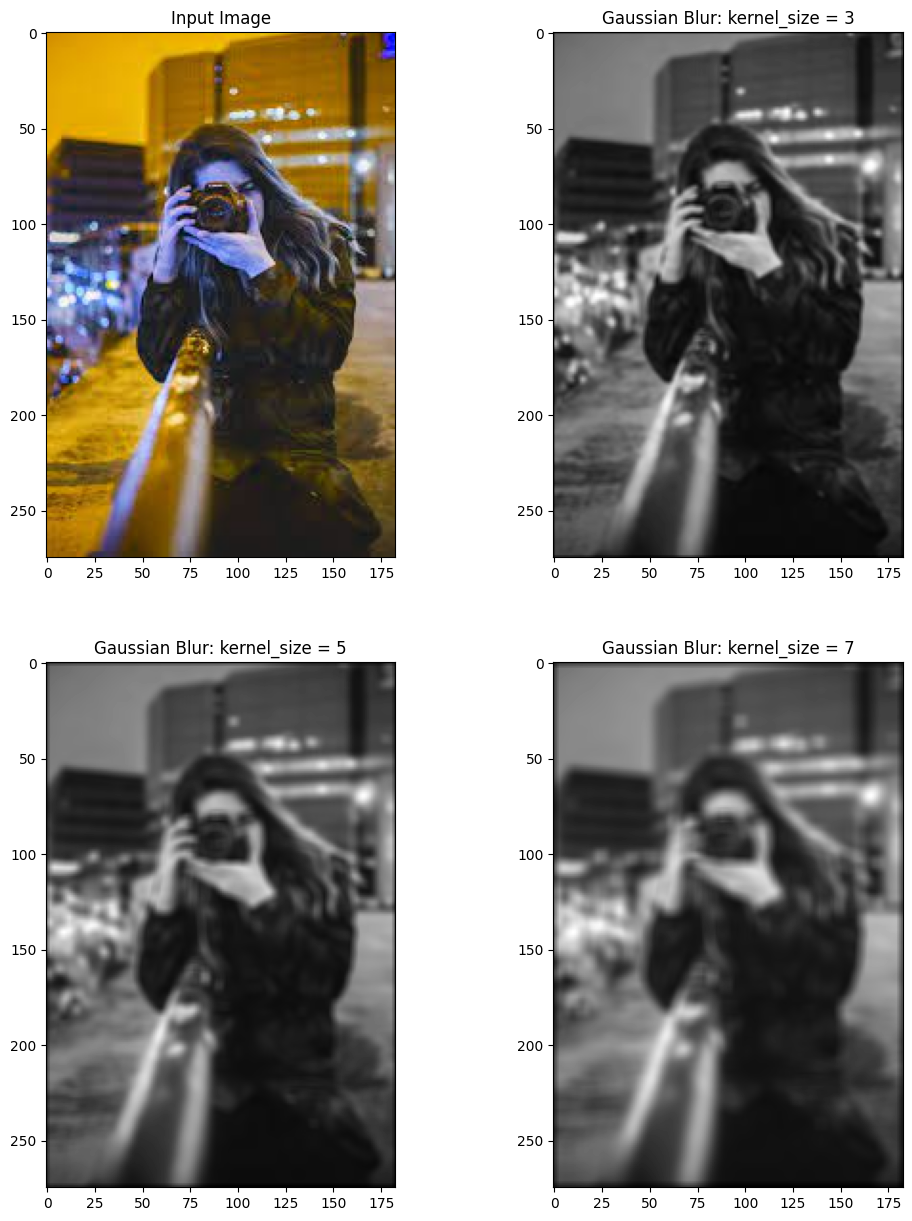

In [29]:
image_1 = cv2.imread('CV-1-Photos/image_1.jpeg')
blured_image_3_3= convolution(kernel_3_3, image_1)
blured_image_5_5= convolution(kernel_5_5, image_1)
blured_image_7_7= convolution(kernel_7_7, image_1)
plot_images(image_1, [blured_image_3_3, blured_image_5_5, blured_image_7_7], [3,5,7])

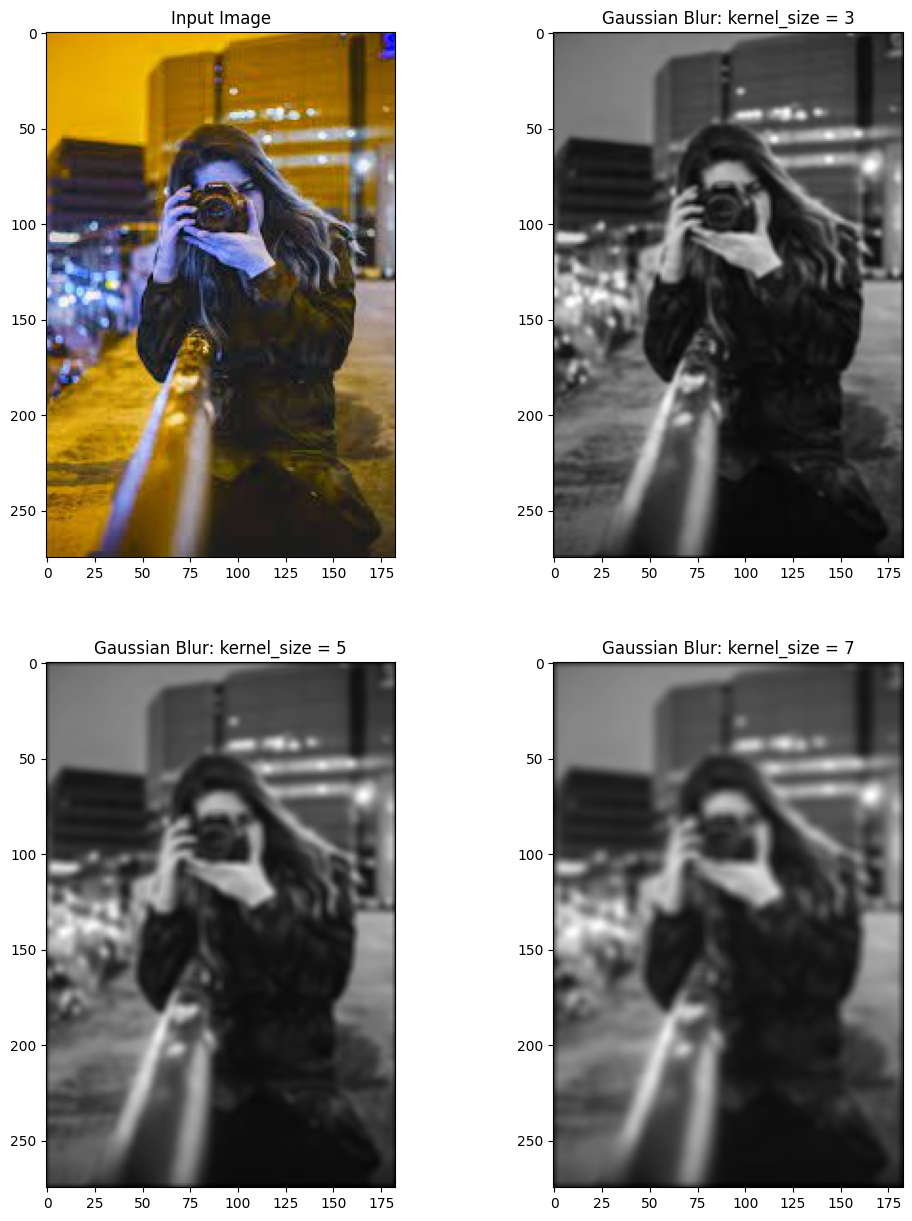

In [30]:
image_1_no_sigma = cv2.imread('CV-1-Photos/image_1.jpeg')
blured_image_3= convolution(kernel_3, image_1_no_sigma)
blured_image_5= convolution(kernel_5, image_1_no_sigma)
blured_image_7= convolution(kernel_7, image_1_no_sigma)
plot_images(image_1_no_sigma, [blured_image_3, blured_image_5, blured_image_7], [3,5,7])

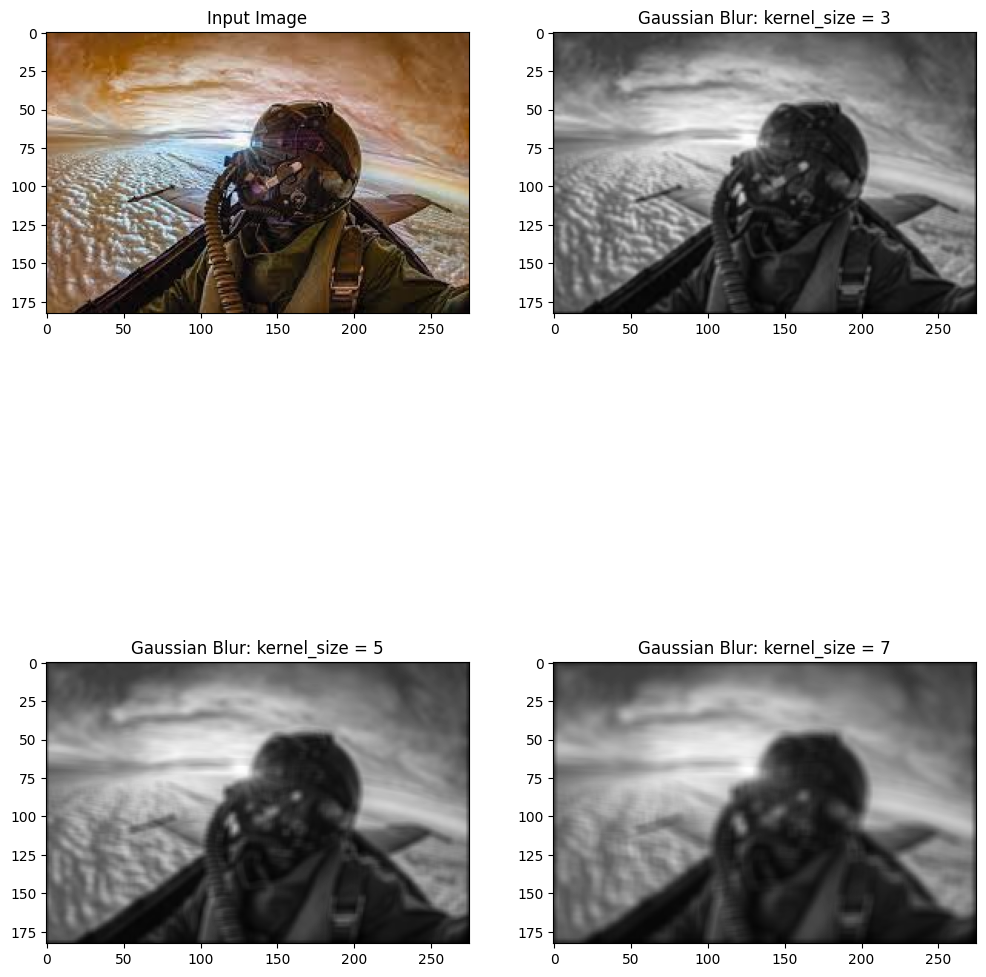

In [32]:
image_2 = cv2.imread('CV-1-Photos/image_2.jpeg')
blured_image_3_3= convolution(kernel_3_3, image_2)
blured_image_5_5= convolution(kernel_5_5, image_2)
blured_image_7_7= convolution(kernel_7_7, image_2)
plot_images(image_2, [blured_image_3_3, blured_image_5_5, blured_image_7_7], [3,5,7])

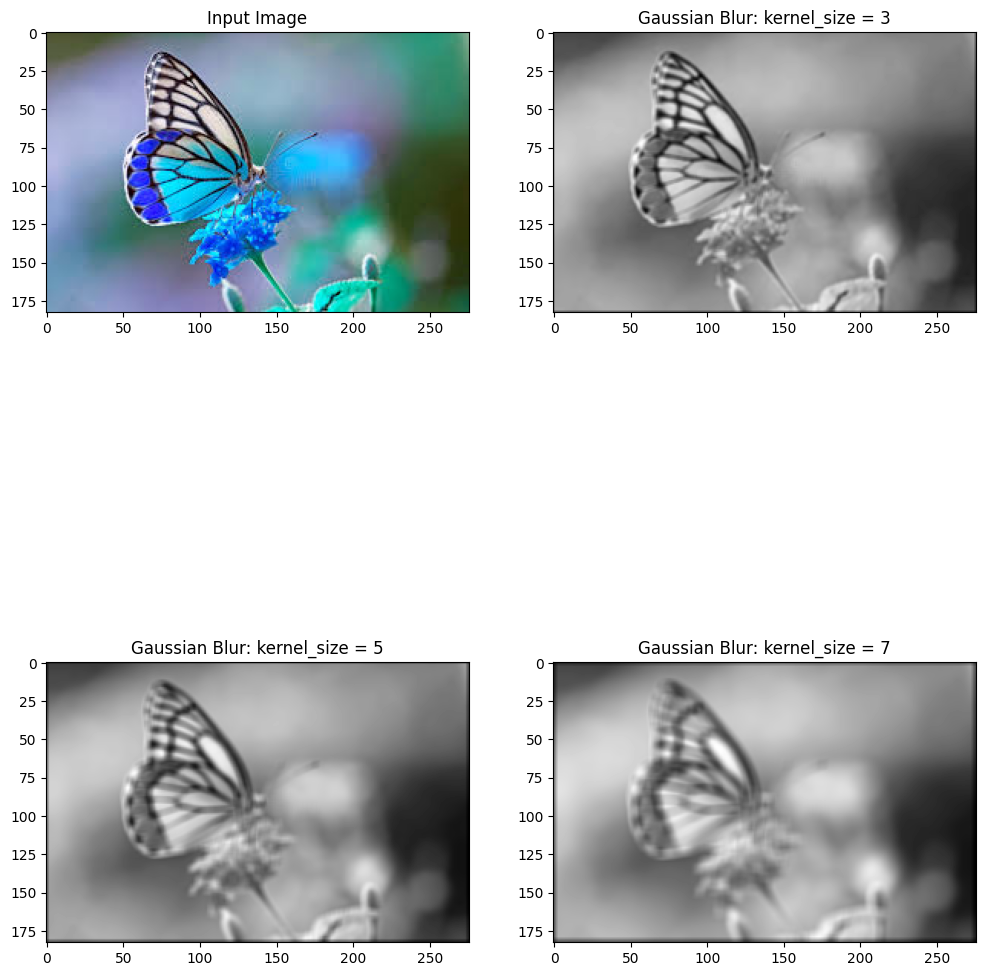

In [33]:
image_3 = cv2.imread('CV-1-Photos/image_3.jpeg')
blured_image_3_3= convolution(kernel_3_3, image_3)
blured_image_5_5= convolution(kernel_5_5, image_3)
blured_image_7_7= convolution(kernel_7_7, image_3)
plot_images(image_3, [blured_image_3_3, blured_image_5_5, blured_image_7_7], [3,5,7])

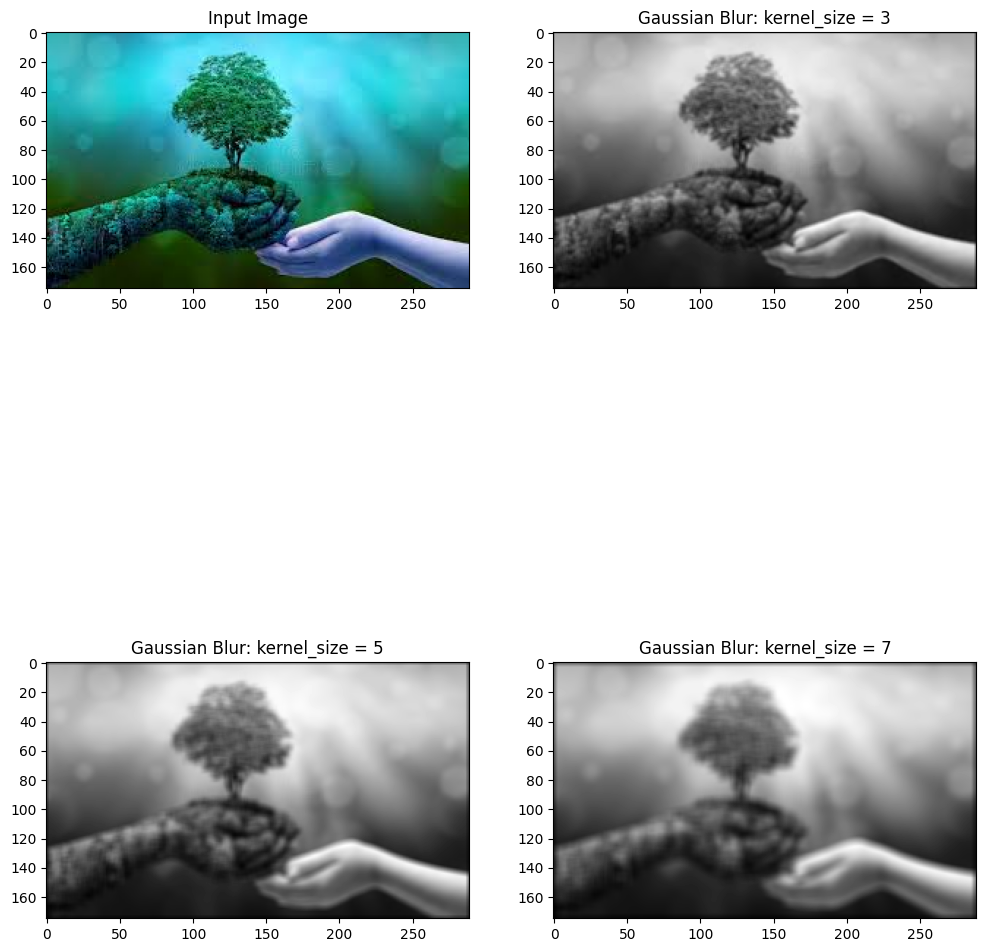

In [34]:
image_4 = cv2.imread('CV-1-Photos/image_4.jpeg', 3)
blured_image_3_3= convolution(kernel_3_3, image_4)
blured_image_5_5= convolution(kernel_5_5, image_4)
blured_image_7_7= convolution(kernel_7_7, image_4)
plot_images(image_4, [blured_image_3_3, blured_image_5_5, blured_image_7_7], [3,5,7])

Dilate

In [35]:
def dilate_image(image, dilation_level=3):
    dilation_level = 3 if dilation_level < 3 else dilation_level

    kernel = np.full(shape=(dilation_level, dilation_level), fill_value=255)

    orig_shape = image.shape
    pad_width = dilation_level - 2

    padded_img = np.pad(array=image, pad_width=pad_width, mode='constant')
    padded_img_shape = padded_img.shape
    h_reduce, w_reduce = (padded_img_shape[0] - orig_shape[0]), (padded_img_shape[1] - orig_shape[1])

    submatrices = np.array([
        padded_img[i:(i + dilation_level), j:(j + dilation_level)]
        for i in range(padded_img_shape[0] - h_reduce) for j in range(padded_img_shape[1] - w_reduce)
    ])

    image_dilate = np.array([255 if (i == kernel).any() else 0 for i in submatrices])
    image_dilate = image_dilate.reshape(orig_shape)

    return image_dilate

In [36]:
def convert_binary(image_src, thresh_val=127):
    color_1 = 255
    color_2 = 0
    initial_conv = np.where((image_src <= thresh_val), image_src, color_1)
    final_conv = np.where((initial_conv > thresh_val), initial_conv, color_2)
    return final_conv

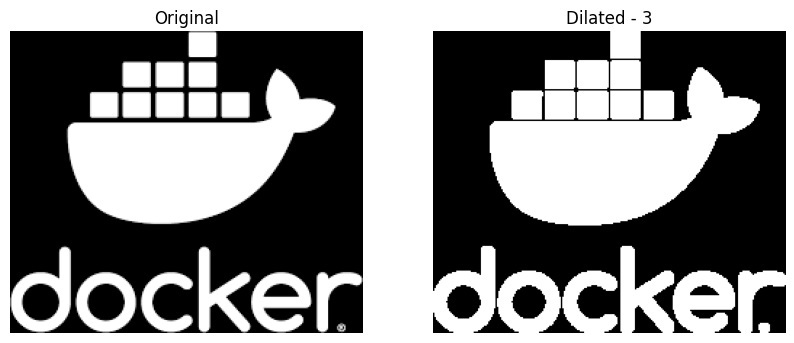

In [37]:
image = cv2.imread('CV-1-Photos/images.png', 0)
dilation_level = 3
image_dilate = dilate_image(convert_binary(image), dilation_level)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))

ax1.axis("off")
ax1.title.set_text('Original')

ax2.axis("off")
ax2.title.set_text("Dilated - {}".format(dilation_level))

ax1.imshow(image, cmap="gray")
ax2.imshow(image_dilate, cmap="gray")
plt.show()

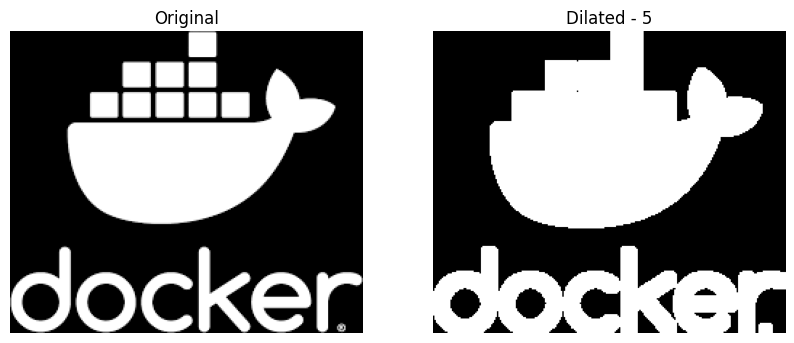

In [39]:
image = cv2.imread('CV-1-Photos/images.png', 0)
dilation_level = 5
image_dilate = dilate_image(convert_binary(image), dilation_level)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))

ax1.axis("off")
ax1.title.set_text('Original')

ax2.axis("off")
ax2.title.set_text("Dilated - {}".format(dilation_level))

ax1.imshow(image, cmap="gray")
ax2.imshow(image_dilate, cmap="gray")
plt.show()